In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error,explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
housing_data = datasets.load_boston()
x,y = shuffle(housing_data.data,housing_data.target,random_state=7)
print("X => {}".format(x.size))
print("Y => {}".format(y.size))
#training and testing data separation
training_amount = int(0.8 * len(x))
x_train , y_train  = x[:training_amount],y[:training_amount]
x_test , y_test = x[training_amount:],y[training_amount:]
#Now model
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(x_train,y_train)
#Using AdaBoost
ab_regress = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400,random_state=7)
ab_regress.fit(x_train,y_train)
#Predictions
y_ab_pred = ab_regress.predict(x_test)
y_dt_pred = dt_regressor.predict(x_test)
#error calculation
mse_dt = mean_squared_error(y_test,y_dt_pred)
evar_dt = explained_variance_score(y_test,y_dt_pred)
print("DT:The mean squared error of ds is {} and the explained variance is {}".format(round(mse_dt,2),round(evar_dt,2)))

mse_dt = mean_squared_error(y_test,y_ab_pred)
evar_dt = explained_variance_score(y_test,y_ab_pred)
print("AB:The mean squared error of ds is {} and the explained variance is {}".format(round(mse_dt,2),round(evar_dt,2)))
# plt.figure()
# plt.scatter(x_train,y_train)
# plt.plot(x_train,y_ab_pred)

X => 6578
Y => 506
DT:The mean squared error of ds is 22.48 and the explained variance is 0.73
AB:The mean squared error of ds is 7.64 and the explained variance is 0.91


In [4]:
#Getting which properties contributed to the model learning
def plot_feature_importance(feature_importance,title,feature_names):
    print(feature_importance)
    feature_importance = 100.0 * (feature_importance/sum(feature_importance))
    index_sorted = np.flipud(np.argsort(feature_importance))
    print(index_sorted)
    pos = np.arange(max(index_sorted)+1) + 0.5
    print(pos)
    print(feature_importance[index_sorted].shape)
    plt.figure()
    plt.bar(pos,feature_importance[index_sorted])
    plt.xticks(pos,feature_names[index_sorted])
    plt.ylabel("RELATIVE IMPORTANCE")
    plt.title(title)
    plt.show()

[0.03856422 0.         0.         0.         0.02908806 0.60474418
 0.00078264 0.10473383 0.         0.         0.02188159 0.
 0.20020548]
[ 5 12  7  0  4 10  6 11  9  8  3  2  1]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]
(13,)


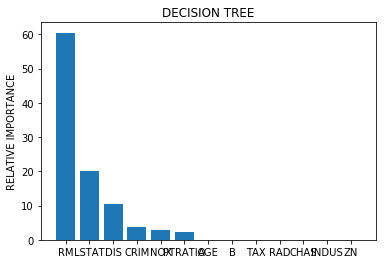

[0.03460496 0.00260478 0.0081857  0.00061997 0.04709509 0.2941107
 0.01169235 0.11697942 0.02167582 0.0479107  0.0524251  0.01856616
 0.34352926]
[12  5  7 10  9  4  0  8 11  6  2  1  3]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]
(13,)


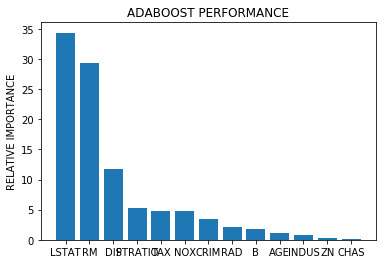

In [56]:
plot_feature_importance(dt_regressor.feature_importances_,"DECISION TREE",housing_data.feature_names)
plot_feature_importance(ab_regress.feature_importances_,"ADABOOST PERFORMANCE",housing_data.feature_names)